In [ ]:
!pip install tensorflow-io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.9 MB 79.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa.display
import soundfile
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_io as tfio
from IPython.display import Audio
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import IPython

In [ ]:
IPython.display.Audio("/content/drive/MyDrive/language_detection/de_f/de_f/de_f_1996a0f045b3301946a9194dfad545ab.fragment13.pitch4.flac")
#German

In [ ]:
IPython.display.Audio("/content/drive/MyDrive/language_detection/en_f/en_f/en_f_5dff2b7b319207972450f91d569b5a16.fragment1.flac")
#English

In [ ]:
IPython.display.Audio("/content/drive/MyDrive/language_detection/es_f/es_f/es_f_1d27c6d589eeff17973ffd0b7a77a70a.fragment1.flac")
#Spanish

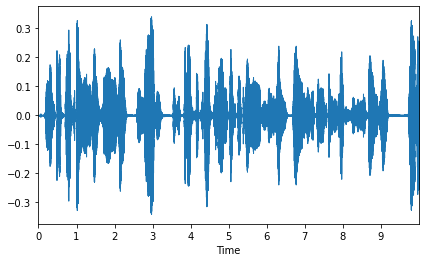

In [ ]:
with soundfile.SoundFile("/content/drive/MyDrive/language_detection/de_f/de_f/de_f_1996a0f045b3301946a9194dfad545ab.fragment13.pitch4.flac") as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveplot(waveform, sr=sample_rate)

In [ ]:
waveform.shape

(220500,)

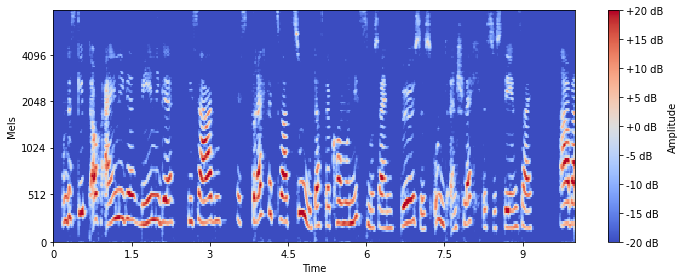

In [ ]:
from matplotlib.colors import Normalize
melspectrogram = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.tight_layout()

In [ ]:
def audio_sample(link):
  info =[]
  for root, __, files in os.walk(link):
    for f in files:
      with soundfile.SoundFile(os.path.join(root, f)) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate
        melspectrogram = librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000)
        images = librosa.power_to_db(S=melspectrogram, ref=np.mean)
        images = (images-images.min())/(images.max() - images.min())
        resized_img = cv2.resize(images,(215,64))
        info.append(resized_img)

  return info

In [ ]:
de_f = audio_sample("/content/drive/MyDrive/language_detection/de_f/de_f")
de_m = audio_sample("/content/drive/MyDrive/language_detection/de_m/de_m")
en_f = audio_sample("/content/drive/MyDrive/language_detection/en_f/en_f")
en_m = audio_sample("/content/drive/MyDrive/language_detection/en_m/en_m")
es_f = audio_sample("/content/drive/MyDrive/language_detection/es_f/es_f")
es_m = audio_sample("/content/drive/MyDrive/language_detection/es_m/es_m")

In [ ]:
de_f[0].shape

(64, 215)

In [ ]:
X,y = [],[]
for i in range(4000):
  X.append(de_f[i])                      #de ->0
  y.append(0)
  X.append(de_m[i])
  y.append(0)
  X.append(en_f[i])                      #en ->1
  y.append(1)
  X.append(en_m[i])
  y.append(1)
  X.append(es_f[i])
  y.append(2)
  X.append(es_m[i])                     #es ->2
  y.append(2)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(24000, 64, 215)

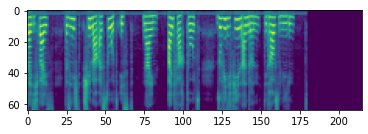

In [ ]:
plt.imshow(X[0])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [ ]:
X_train.shape

(19200, 64, 215)

In [ ]:
CNN = keras.Sequential([
                          keras.layers.Conv2D(filters=32,input_shape=(64,215,1),activation='relu',kernel_size=(3,3)),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Dropout(0.15),
                          keras.layers.Conv2D(filters=44,activation='relu',kernel_size=(3,3)),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Dropout(0.2),
                          keras.layers.Conv2D(filters=53,activation='relu',kernel_size=(3,3)),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Dropout(0.2),
                          keras.layers.Conv2D(filters=60,activation='relu',kernel_size=(3,3)),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Dropout(0.2),
                        
                          keras.layers.Flatten(),
                          keras.layers.Dense(120,activation='relu'),
                          keras.layers.Dense(3,activation='sigmoid'),

])

In [ ]:
CNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
CNN.fit(X_train,y_train,epochs = 10,batch_size=24)

Epoch 1/10
800/800 [==============================] - 10s 12ms/step - loss: 0.1998 - accuracy: 0.9225
Epoch 2/10
800/800 [==============================] - 9s 12ms/step - loss: 0.1391 - accuracy: 0.9495
Epoch 3/10
800/800 [==============================] - 10s 13ms/step - loss: 0.1152 - accuracy: 0.9570
Epoch 4/10
800/800 [==============================] - 10s 13ms/step - loss: 0.0945 - accuracy: 0.9657
Epoch 5/10
800/800 [==============================] - 10s 13ms/step - loss: 0.0802 - accuracy: 0.9714
Epoch 6/10
800/800 [==============================] - 10s 13ms/step - loss: 0.0696 - accuracy: 0.9753
Epoch 7/10
800/800 [==============================] - 10s 13ms/step - loss: 0.0679 - accuracy: 0.9760
Epoch 8/10
800/800 [==============================] - 11s 14ms/step - loss: 0.0539 - accuracy: 0.9809
Epoch 9/10
800/800 [==============================] - 10s 13ms/step - loss: 0.0506 - accuracy: 0.9815
Epoch 10/10
800/800 [==============================] - 10s 12ms/step - loss: 0.0496

In [ ]:
CNN.evaluate(X_test,y_test)

150/150 [==============================] - 1s 8ms/step - loss: 0.0360 - accuracy: 0.9890


[0.0360427126288414, 0.9889583587646484]